# Özellik Mühendisliği

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
baslik_font= {"family":"arial","color":"darkred","weight":"bold","size":13}
eksen_font = {'family':"arial","color":"darkred","weight":"bold","size":10}
pd.options.display.float_format= '{:.3f}'.format

In [20]:
ogrenciler = pd.read_csv('StudentsPerformance.csv')
ogrenciler.columns=['cinsiyet',"grup","aile_egitimi","yemek","kurs","mat_notu","okuma_notu","yazma_notu"]
ogrenciler.head()

,cinsiyet,grup,aile_egitimi,yemek,kurs,mat_notu,okuma_notu,yazma_notu
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


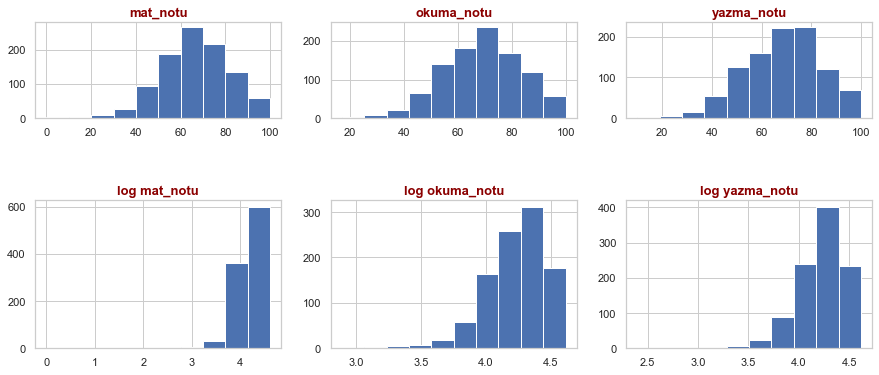

In [3]:
plt.figure(figsize=(15,6))
degiskenler = ['mat_notu',"okuma_notu","yazma_notu"]

for i in np.arange(3):
    plt.subplot(3,3,i+1)
    plt.hist(ogrenciler[degiskenler[i]])
    plt.title(degiskenler[i],fontdict=baslik_font)
    

for i in np.arange(3):
    plt.subplot(2,3,i+4)
    plt.hist(np.log(ogrenciler[degiskenler[i]]+1)) # eger değerlerden biri '0' olursa log sonsuza gittiği için hata verir o yüzden +1 
    plt.title("log "+degiskenler[i],fontdict=baslik_font)
    

plt.show()    

 Yukarıda ki grafikleriden değişkenlerimizin dönüştürülmemiş hali normal dağılıma yakınlar fakat tam olarak normal dagılım değiller log dönüşümlerini aldıklarımız da ise norma dagılımdan daha da uzaklaştılar
 
##### İstatistiksel anlamda gerçekten normal dağılıma sahipler mi ? bakalım 
##### bunun için Jarque-Bera ve Normal testlerin sonuçlarına bakalım

In [5]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest
pd.options.display.float_format = '{:.5f}'.format

ozellikler = ['mat_notu',"okuma_notu","yazma_notu"]
dagilim_testleri = pd.DataFrame(columns=['ozellik', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for ozellik in ozellikler:
    jb_stats = jarque_bera(ogrenciler[ozellik])
    norm_stats = normaltest(ogrenciler[ozellik])
    dagilim_testleri = dagilim_testleri.append({"ozellik": ozellik,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)

dagilim_testleri

,ozellik,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,mat_notu,15.91226,0.00035,15.40896,0.00045
1,okuma_notu,11.38330,0.00337,11.11741,0.00385
2,yazma_notu,13.98509,0.00092,13.60645,0.00111


In [9]:
degiskenler = ['mat_notu',"okuma_notu","yazma_notu"]
for i in range(3):
    a=ogrenciler[ogrenciler[degiskenler[i]]==0]
    print(a)

   cinsiyet     grup      aile_egitimi         yemek  kurs  mat_notu  \
59   female  group C  some high school  free/reduced  none         0   

    okuma_notu  yazma_notu  
59          17          10  
Empty DataFrame
Columns: [cinsiyet, grup, aile_egitimi, yemek, kurs, mat_notu, okuma_notu, yazma_notu]
Index: []
Empty DataFrame
Columns: [cinsiyet, grup, aile_egitimi, yemek, kurs, mat_notu, okuma_notu, yazma_notu]
Index: []


In [10]:
ogrenciler[ogrenciler['mat_notu']==0]

,cinsiyet,grup,aile_egitimi,yemek,kurs,mat_notu,okuma_notu,yazma_notu
59,female,group C,some high school,free/reduced,none,0,17,10


In [11]:
# sınav notları normal dagılım mı ? 
# [0 ve 1] aralıgında yeniden ölçeklendirdir verileri..
from sklearn.preprocessing import normalize

ogrenciler['norm_math_score'] = normalize(np.array(ogrenciler['mat_notu']).reshape(1,-1)).reshape(-1,1)
ogrenciler['norm_okuma_score'] = normalize(np.array(ogrenciler['okuma_notu']).reshape(1,-1)).reshape(-1,1)
ogrenciler['norm_yazma_score'] = normalize(np.array(ogrenciler['yazma_notu']).reshape(1,-1)).reshape(-1,1)

normal_ozellikler= ['mat_notu',"norm_math_score","okuma_notu","norm_okuma_score","yazma_notu","norm_yazma_score"]

print("Minimum Degerler \n ----------------",)
print(ogrenciler[normal_ozellikler].min())
print("Maximum Degerler \n ----------------",)
print(ogrenciler[normal_ozellikler].max())


Minimum Degerler 
 ----------------
mat_notu            0.00000
norm_math_score     0.00000
okuma_notu         17.00000
norm_okuma_score    0.00760
yazma_notu         10.00000
norm_yazma_score    0.00454
dtype: float64
Maximum Degerler 
 ----------------
mat_notu           100.00000
norm_math_score      0.04664
okuma_notu         100.00000
norm_okuma_score     0.04473
yazma_notu         100.00000
norm_yazma_score     0.04535
dtype: float64


Normalleştirdiğimiz değerleri grafik üzerinde görelim.

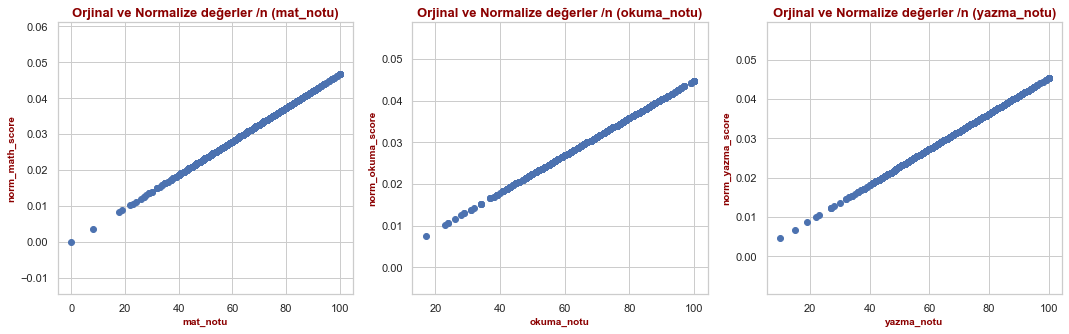

In [12]:
plt.figure(figsize=(18,5))

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.scatter(ogrenciler[normal_ozellikler[2*i]], ogrenciler[normal_ozellikler[2*i+1]])
    plt.title("Orjinal ve Normalize değerler /n ({})".format(normal_ozellikler[2*i]), fontdict=baslik_font)
    plt.xlabel(normal_ozellikler[2*i],fontdict=eksen_font)
    plt.ylabel(normal_ozellikler[2*i+1],fontdict=eksen_font)
    
plt.show()

In [13]:

ogrenciler['ORT_NOT']= ogrenciler[degiskenler[i]]

In [18]:
ogrenciler.drop(['ORT_NOT'], axis=1, inplace=True)

In [22]:
ogrenciler.head()

,cinsiyet,grup,aile_egitimi,yemek,kurs,mat_notu,okuma_notu,yazma_notu
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


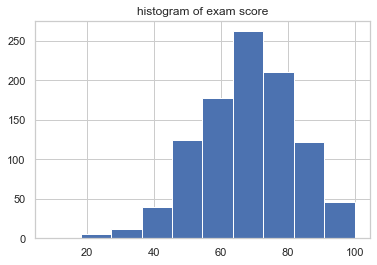

Jarque-Bera test istatistik 15.453387913085164 ve p degeri 0.00044089934264401887
Normal test istatistik 15.186721327231322 ve p degeri 0.0005037851534494478


In [23]:
exam_score = (ogrenciler['mat_notu']+ ogrenciler['okuma_notu']+ogrenciler['yazma_notu'])/3

plt.hist(exam_score)
plt.title("histogram of exam score")
plt.show()

jb_stats= jarque_bera(exam_score)
norm_stats= normaltest(exam_score)

print("Jarque-Bera test istatistik {} ve p degeri {}".format(jb_stats[0],jb_stats[1]))
print("Normal test istatistik {} ve p degeri {}".format(norm_stats[0],norm_stats[1]))


 Ort. dagılımları normal dağılım değil

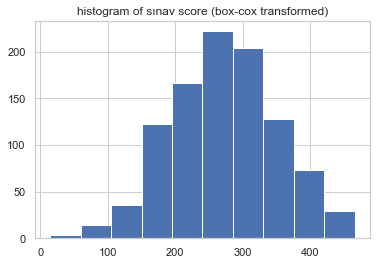

Jarque-Bera test istatistik 2.435398933127944 ve p degeri 0.29591013563983815
Normality test istatistik 2.779857602227654 ve p degeri 0.24909303914726255


In [32]:
from scipy.stats import boxcox

exams_boxcox,_ = boxcox(exam_score)

plt.hist(exams_boxcox)
plt.title("histogram of sınav score (box-cox transformed)")
plt.show()

jb_stats = jarque_bera(exams_boxcox)
norm_stats = normaltest(exams_boxcox)

print("Jarque-Bera test istatistik {} ve p degeri {}".format(jb_stats[0], jb_stats[1]))
print("Normality test istatistik {} ve p degeri {}".format(norm_stats[0], norm_stats[1]))

Yukarıdaki dağılım normal dağılımlıdır. 

# 3. Bir önceki soruda oluşturduğumuz hedef değişkeni ile hangi değişkenler ilişkili görünüyor? Eğer amacımız sınav başarısını belirleyen etkenleri açıklamak olsaydı hangi değişkenleri veri kümemizde tutmamız gerekirdi?¶

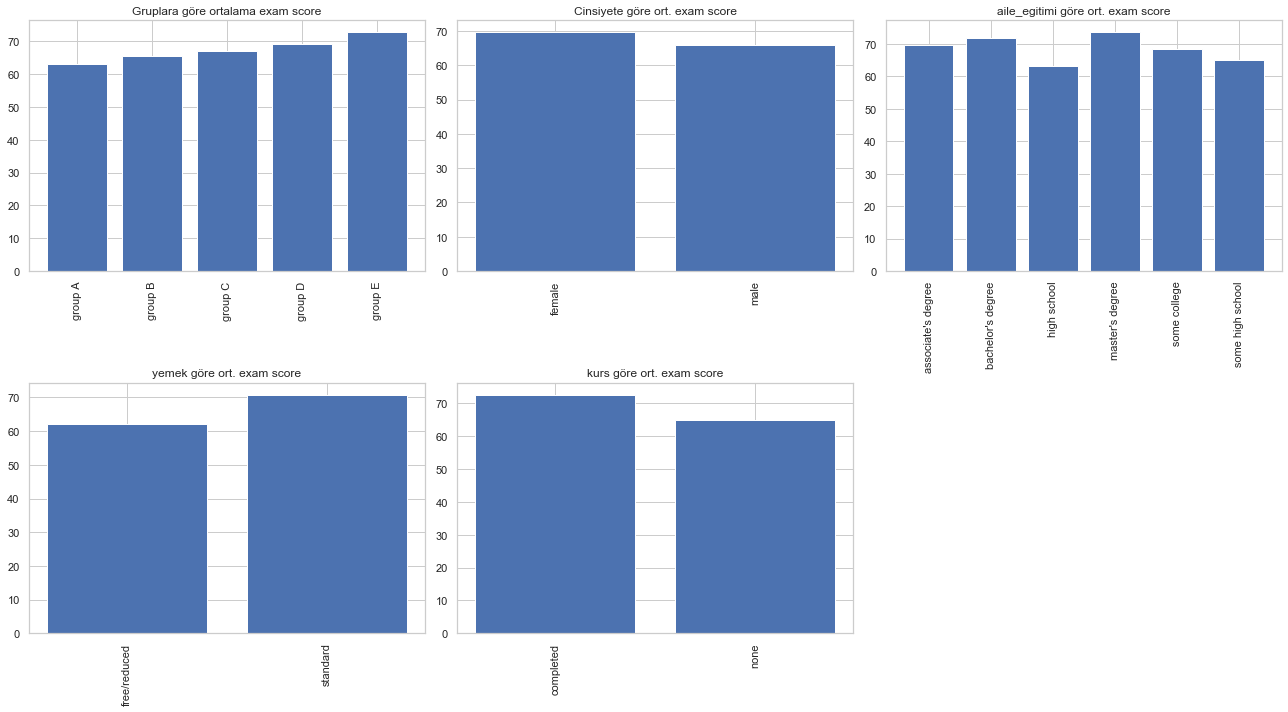

In [36]:
ogrenciler['exam_score']= exam_score

plt.figure(figsize=(18,10))

plt.subplot(2,3,1)
plt.bar(ogrenciler.groupby("grup")['exam_score'].mean().index,  ogrenciler.groupby("grup")['exam_score'].mean())
plt.title("Gruplara göre ortalama exam score")
plt.xticks(rotation= "vertical")

plt.subplot(2,3,2)
plt.bar(ogrenciler.groupby('cinsiyet')['exam_score'].mean().index, ogrenciler.groupby('cinsiyet')["exam_score"].mean())
plt.title("Cinsiyete göre ort. exam score")
plt.xticks(rotation="vertical")

plt.subplot(2,3,3)
plt.bar(ogrenciler.groupby('aile_egitimi')["exam_score"].mean().index, ogrenciler.groupby('aile_egitimi')["exam_score"].mean())
plt.title("aile_egitimi göre ort. exam score")
plt.xticks(rotation="vertical")

plt.subplot(2,3,4)
plt.bar(ogrenciler.groupby('yemek')["exam_score"].mean().index, ogrenciler.groupby('yemek')["exam_score"].mean())
plt.title("yemek göre ort. exam score")
plt.xticks(rotation="vertical")

plt.subplot(2,3,5)
plt.bar(ogrenciler.groupby('kurs')["exam_score"].mean().index, ogrenciler.groupby('kurs')["exam_score"].mean())
plt.title("kurs göre ort. exam score")
plt.xticks(rotation="vertical")


plt.tight_layout()
plt.show()